In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [6]:
import os

In [22]:
base_dir = r'D:\\pythontensorflow\\myna\\'
myna_folders = ['crested_myna', 'javan_myna', 'common_myna']

In [23]:
thedir=base_dir+myna_folders[0]
os.listdir(thedir)


['crested_myna01.jpg', 'crested_myna02.jpg', 'crested_myna03.jpg']

In [18]:
root = "D:\pythontensorflow\myna"
files = []
walk = [root]
while walk:
    folder = walk.pop(0) + "/"
    items = os.listdir(folder)
    for i in items:
        i = folder + i
        (walk if os.path.isdir(i) else files).append(i)
print(files)

['D:\\pythontensorflow\\myna/cnn_birds.ipynb', 'D:\\pythontensorflow\\myna/common_myna/common_myna01.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna02.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna03.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna04.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna05.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna06.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna07.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna08.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna09.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna10.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna11.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna12.jpg', 'D:\\pythontensorflow\\myna/common_myna/common_myna13.jpg', 'D:\\pythontensorflow\\myna/crested_myna/crested_myna01.jpg', 'D:\\pythontensorflow\\myna/crested_myna/crested_myna02.jpg', 'D:\\pythontensorflow\\myna/crested_myna/crested_

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\吳哲辰\AppData\Local\Temp\ipykernel_16776\907787098.py:1: SyntaxWarning: invalid escape sequence '\p'
  root = "D:\pythontensorflow\myna"


將這三個資料夾底下的照片作成輸入 (data)、輸出 (target)。

In [24]:
data = []
target = []
for i in range(3):
    thedir = base_dir + myna_folders[i]
    myna_fnames = os.listdir(thedir)
    for myna in myna_fnames:
        img_path = thedir + '/' + myna
        img = load_img(img_path , target_size = (256,256))
        x = img_to_array(img)
        data.append(x)
        target.append(i)

In [26]:
data = np.array(data)

In [27]:
data.shape

(23, 256, 256, 3)

(-0.5, 255.5, 255.5, -0.5)

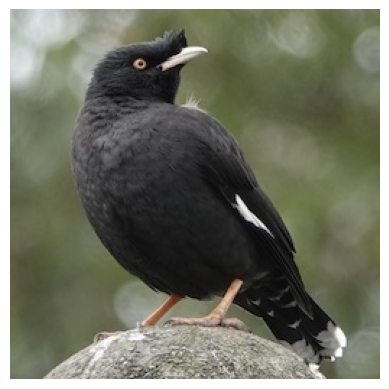

In [28]:
n=1
plt.imshow(data[n]/255)
plt.axis('off')

用 ResNet 的預處理

In [29]:
x_train=preprocess_input(data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 255.5, 255.5, -0.5)

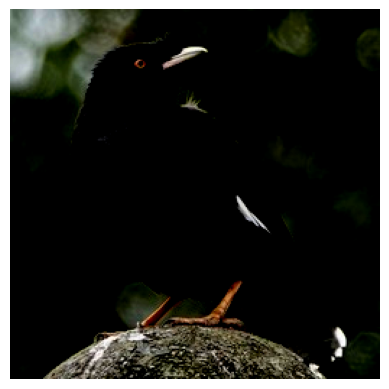

In [30]:
plt.imshow(x_train[n])
plt.axis('off')

每張圖的答案就是 0, 1, 2 其中一個數字。

In [31]:
target[n]

0

做 one-hot enconding。

In [32]:
y_train=to_categorical(target,3)

In [33]:
y_train[0]

array([1., 0., 0.])

用 ResNet50 打造我們的神經網路

In [34]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
resnet = ResNet50V2(include_top=False, pooling="avg")

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [36]:
model = Sequential()

最後一層是本測試增加的

In [37]:
model.add(resnet)

輸出層

In [38]:
model.add(Dense(3, activation='softmax'))

因為是遷移式學習, 原本 ResNet 的部份沒有重新訓練的意思。於是就設這邊不需要訓練。

In [39]:
resnet.trainable = False

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ ?                      │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

組裝神經網路

In [41]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

訓練

In [42]:
model.fit(x_train, y_train, batch_size=23, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1304 - loss: 1.8547
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step - accuracy: 0.1304 - loss: 1.3881
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.3913 - loss: 1.0809
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step - accuracy: 0.5217 - loss: 0.9100
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.6087 - loss: 0.8372
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.6087 - loss: 0.8110
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.6087 - loss: 0.7915
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.6087 - loss: 0.7617
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.6522 - loss: 0.7207
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.7826 - loss: 0.6737


確認模型表現

In [43]:
loss, acc = model.evaluate(x_train, y_train)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8261 - loss: 0.6257
Loss: 0.6256881952285767
Accuracy: 0.8260869383811951


In [44]:
labels = ["土八哥", "白尾八哥", "家八哥"]

預測結果

In [45]:
y_predict = np.argmax(model.predict(x_train), -1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [46]:
y_predict

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int64)

target是正確答案

In [47]:
target

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [48]:
import gradio as gr

In [49]:
def classify_image(inp):
    inp = inp.reshape((-1, 256, 256, 3))
    inp = preprocess_input(inp)
    prediction = model.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(3)}

In [51]:
image = gr.Image( label="八哥照片")
label = gr.Label(num_top_classes=3, label="AI辨識結果")
some_text="我能辨識（土）八哥、白尾八哥、家八哥。找張八哥照片來考我吧!"

In [52]:
sample_images = []
for i in range(3):
    thedir = base_dir + myna_folders[i]
    for file in os.listdir(thedir):
        sample_images.append(myna_folders[i] + '/' + file)

In [54]:
gr.Interface(fn=classify_image,  inputs=image, outputs=label, title="AI 八哥辨識機",description=some_text,examples=sample_images).launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://9e29f047b0a3e9cac5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
